## Clustering Analaysis
#### Working with Unlabeled Data

- Clustering is a technique that allows us to find groups of similar objects and their relativity 
- Examples include grouping documents, music, movies, customer behavior, recommendation engines.
- **Prototype-based, Hierarchical, and Desnity-based clustering**.
- K-means is a prototype-based clustering, meaning each cluster is represented by a prototype
- The **elbow** and **silhouette plots** are useful techniques to evaluate the quality of a clustering to determine optimal number of clusters (k).

<p>

- A prototype 
    - can be a **centroid** (average) of similar points with continuous features
    - can be a **medoid** (most representative point) in the case of categorical features.
    



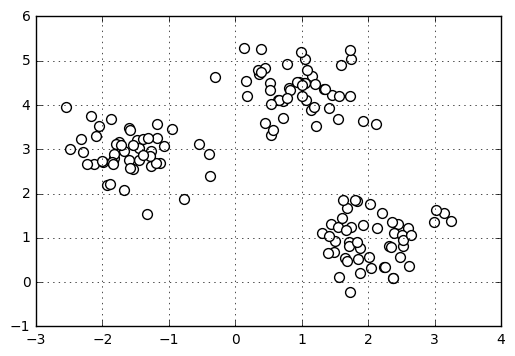

In [27]:
# Simple two-dimensional dataset for the purpose of visualization
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', s=50)

plt.grid(); plt.show()

### K-means algorithm summarized by four steps
1) Randoml pick k centroids from the sample points as initial cluster centers.  
2) Assign each sample to the nearest centroid  
3) Move the centroids to the center of the samples that were assigned to it.  
4) Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or a maximum number of iterations is reached

- Measure of similarity between objects?
    - E.g; **Squared Euclidean Distance** between two points x and y in m-dimensional space  
   <br>
- Based on the Euclidean distance metric, we can describe the k-means algo as a simple optimization problem.
    - An interative approach for minimizing the **within-cluster sum of squared errors** (SSE)
    - Also called **cluster inertia**

In [4]:
from sklearn.cluster import KMeans

# Set the number of desired clusters to 3;
# n_init; Run 10 times indepdendently with different random centroids
# Chooses the final model as the one with the lowest SSE
# max_iter ; maximum number of iterations for each single run.
# tol = tolerance parameter in regards to the changes in the SSE to declare convergence. 
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X)

### K-means++ algorithm (D.Arthur and S. Vassilvitskii)

- Place initial centroids far away from each other. Run multiple times and chose best performing model in terms of the SSE.

1) Initialize an empty set **M** to store the **k** centroids being selected  
2) Randomly choose the first centroid from the input samples and assign it to **M**.  
3) For each sample **x** that is not in **M**, find the minimum squared distance to any of the centroids in **M**.  
4) To randomly select the next centroid, use a weighted probability distribution.  
5) Repeat steps 2 and 3 until k centroids are chosen  
6) Proceed with the classic k-means algorithim  
 

In [6]:
from sklearn.cluster import KMeans

# In sklearn, just set init to k-means++ to include the above processes. 
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X)

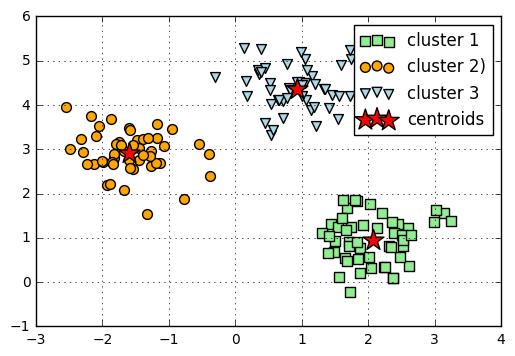

In [32]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='orange', marker='o', label='cluster 2)')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='lightblue', marker='v', label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')

plt.legend(); plt.grid(); plt.show(); 

### Hard versus Soft Clustering

- Hard Clustering; describes a family of algorthms where each sample in a dataset is assigned to exactly one cluster (i.e k-means)  
- Soft Clustering (fuzzy); assigns a sample to one or more clusters. (Fuzzy C-means FCM)

### Elbow method to find the optimal number of clusters

- To quantify the quality of clustering, we need to use intrinsic metrics, i.e the SSE (distortion) to compare the performance of different k-means clusterings.
- Bsaed on the within-cluster SSE, we can use the **elbow method** to estimate the optimal number of clusters for k for a given task.
- Intuitively, if k increases, the distortion will decrease. (Samples will be closer to the centroids they are assigned to)

In [35]:
# The within-cluster SSE is stored via the inertia_ attribute after fitting a KMeans model
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


As we can see in the following plot, the **elbow** is located at **k=3**

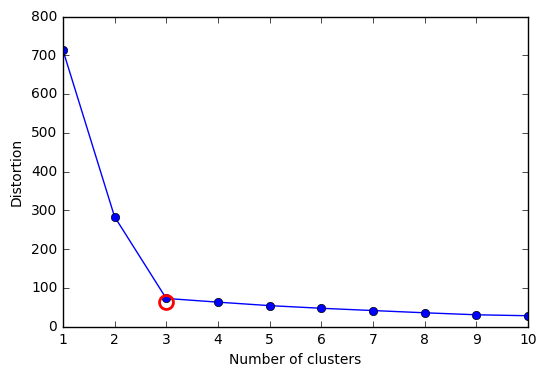

In [47]:
# Create an empty list
distortions = []

# Iterate 10 times and append distortion value to list
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
# Plot the elbow
plt.plot(range(1,11), distortions, marker='o')

# Circle point 3
plt.plot(3, distortions[3], 'o',ms=10, mec='r', mfc='none', mew=2)

plt.xlabel('Number of clusters'); plt.ylabel('Distortion'); plt.show()

### Silhouette Plots

- Another intrinsic metric to evaluate the quality of our clustering
- Plot a measure of how tightly grouped the samples in the cluster are. (silhouette coefficient)

Example of a silhouette plot with good custering. (coefficients not close to 0), also similar lengths and widths

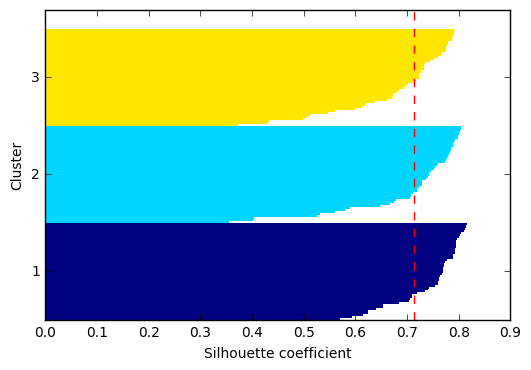

In [59]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def silhouette_plot_example(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        y_ticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(y_ticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()
    
silhouette_plot_example(n_clusters=3)

#### Example of suboptimal clustering

- Changed the n_clusters to 2 and 4, you can visibily see different lengths and widths in the resulting plot

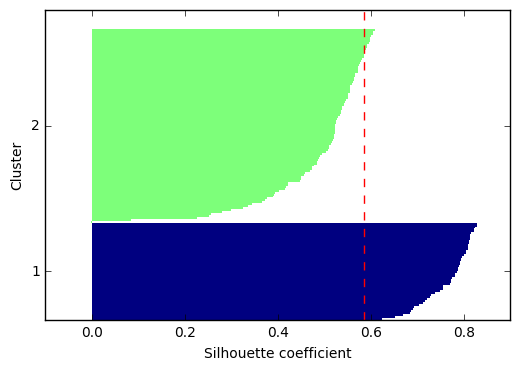

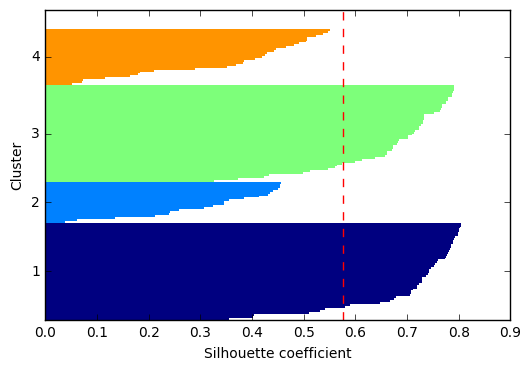

In [61]:
silhouette_plot_example(n_clusters=2);
silhouette_plot_example(n_clusters=4);